In [256]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn as sk
import sklearn.metrics as metric
import math 

In [207]:
data=pd.read_csv('complete.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       3755 non-null   object 
 1   Name of State / UT         3755 non-null   object 
 2   Latitude                   3755 non-null   float64
 3   Longitude                  3755 non-null   float64
 4   Total Confirmed cases      3755 non-null   int64  
 5   Death                      3755 non-null   int64  
 6   Cured/Discharged/Migrated  3755 non-null   int64  
 7   New cases                  3755 non-null   int64  
 8   New deaths                 3755 non-null   int64  
 9   New recovered              3755 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 293.5+ KB


In [210]:
data1=data.drop(columns=['Latitude','Longitude'],axis=1)
cmplt=data1[data1["Name of State / UT"]=="Himachal Pradesh"]
cmplt=cmplt[(cmplt['Date']>"2020-06-15") & (cmplt['Date']<="2020-07-10")].reset_index()
cmplt=cmplt.loc[1::,::]
cmplt

,index,Date,Name of State / UT,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
1,3067,2020-06-17,Himachal Pradesh,560,8,372,4,0,19
2,3102,2020-06-18,Himachal Pradesh,569,8,372,9,0,0
3,3137,2020-06-19,Himachal Pradesh,595,8,382,26,0,10
4,3172,2020-06-20,Himachal Pradesh,619,8,388,24,0,6
5,3207,2020-06-21,Himachal Pradesh,656,8,413,37,0,25
6,3242,2020-06-22,Himachal Pradesh,673,8,425,17,0,12
7,3277,2020-06-23,Himachal Pradesh,727,8,437,54,0,12
8,3312,2020-06-24,Himachal Pradesh,775,8,443,48,0,6
9,3347,2020-06-25,Himachal Pradesh,806,8,466,31,0,23
10,3382,2020-06-27,Himachal Pradesh,864,9,502,58,1,36


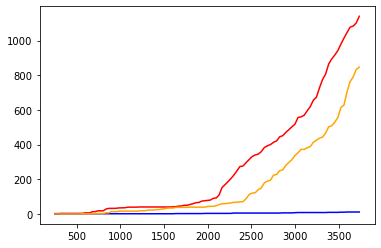

In [211]:
hp=data[data["Name of State / UT"]=="Himachal Pradesh"]
plt.plot(hp['Total Confirmed cases'],color='red')
plt.plot(hp['Death'],color="blue")
plt.plot(hp['Cured/Discharged/Migrated'],color="orange")
plt.show()

<b>Heatmap for better data corellation</b>

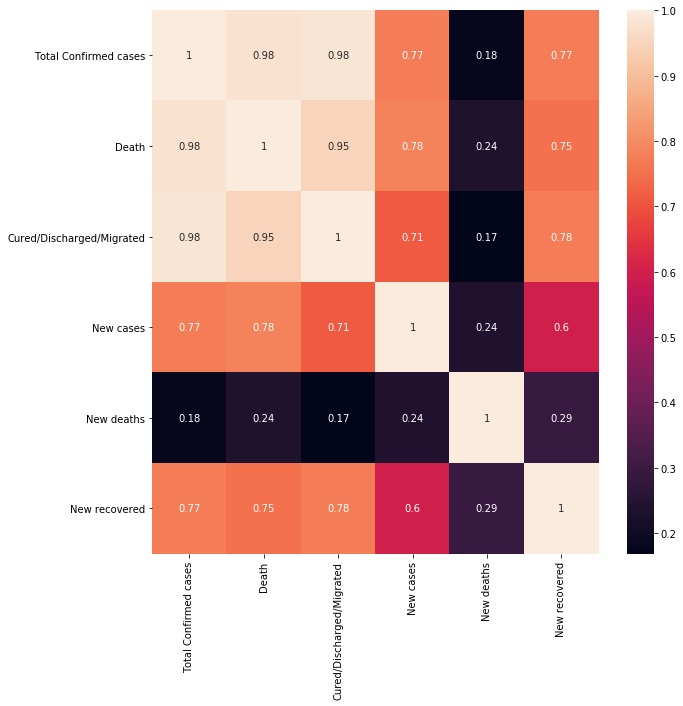

In [297]:
fig, ax = plt.subplots(figsize=(10,10))     
sns.heatmap(hp[['Total Confirmed cases','Death','Cured/Discharged/Migrated','New cases','New deaths','New recovered']].corr(),annot=True, ax=ax)

<b> Prediction of total confirmed new cases</b>

In [298]:
cmplt_t=cmplt.iloc[1::,1::]
X=cmplt.iloc[1:,4::]
y=cmplt.iloc[1:,3]

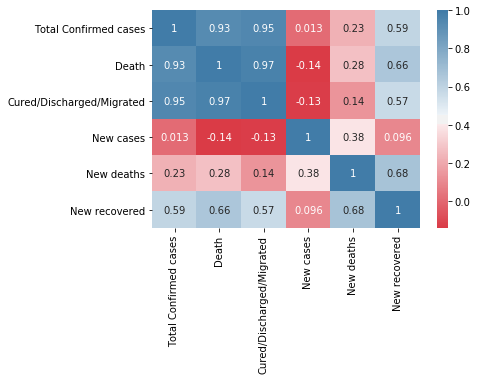

In [299]:
cmap = sns.diverging_palette(h_neg=10,h_pos=240,as_cmap=True) 
sns.heatmap(cmplt_t.corr(),cmap=cmap,annot=True)

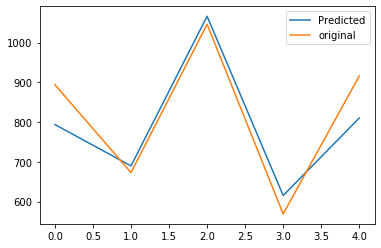

In [300]:
lr=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2)
lrt=lr.fit(X_train,y_train)
lrt.predict(X_test)
plt.plot(lrt.predict(X_test),label="Predicted")
plt.plot(np.array(y_test),label="original")
plt.legend()

[ 864  656 1077  595  942]


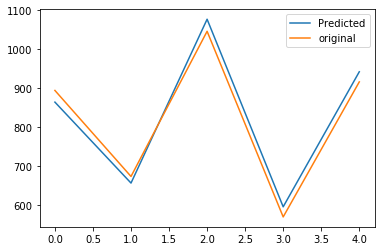

In [302]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2)
knn.fit(X_train,y_train)
print(knn.predict(X_test))
knn.score(X_test,y_test)
plt.plot(knn.predict(X_test),label="Predicted")
plt.plot(np.array(y_test),label="original")
plt.legend()

In [310]:
from sklearn import svm
from sklearn.datasets import make_classification
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2)
regr = svm.SVR(kernel='precomputed')
regr.fit(X_train, y_train)
regr.predict(X_test)
plt.plot(regr.predict(X_test),label="Predicted")
plt.plot(np.array(y_test),label="original")
plt.legend()

ValueError: Precomputed matrix must be a square matrix. Input is a 14x5 matrix.